# Activity 3.3 - CNN Network Architectures

#### Objective(s):

This activity aims to introduce how to use CNN network architectures

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use pretrained model in predicting the object
* Evaluate the accuracy of each pretrained model

#### Resources:
* Jupyter Notebook
* MNIST

#### Procedures
Load the necessary libraries

In [ ]:
# install opencv if you haven't
# pip install opencv-python
# pip install pillow

In [ ]:
from PIL import Image
from keras.preprocessing import image
import numpy as np
import pandas as pd

import cv2

from matplotlib.image import imread
import matplotlib.pyplot as plt

Create a function that will capture and save the image from your webcam

In [ ]:
# def get_image(camera):
#     retval, im = camera.read()
#     return im

In [ ]:
# def save_webcam_image(img_path):

#     try:
#         camera_port = 0
#         ramp_frames = 10

#         camera = cv2.VideoCapture(camera_port)

#         for i in range(ramp_frames):
#             retval, im_camera = camera.read()

#         retval, im_camera = camera.read()

#         im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
#         cv2.imwrite(img_path, im)
#         del (camera)
#         return True
#     except ValueError as e:
#         print("Image Capture Failed")
#     return False

Using the Google Colab code snippet for camera capture

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image

try:
    filename = take_photo()
    print('Saved to {}'.format(filename))

    # Load the captured image
    img = cv2.imread(filename)

    # Resize the image to 224x224
    resized_img = cv2.resize(img, (224, 224))

    # Save the resized image
    resized_filename = 'resized_photo.jpg'
    cv2.imwrite(resized_filename, resized_img)

    print('Resized image saved to {}'.format(resized_filename))

except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

<IPython.core.display.Javascript object>

Saved to photo.jpg
Resized image saved to resized_photo.jpg


* Test your function.
* Place a clock or any object
* Display the saved image

In [ ]:
img_path = "/content/resized_photo.jpg"

# if save_webcam_image(img_path) is False:
#     # Webcam not active, use the Dog Image
#     img_path = "rocking_chair.jpg"
#     print("Using the Test Rocking Chair Image: {}".format(img_path))

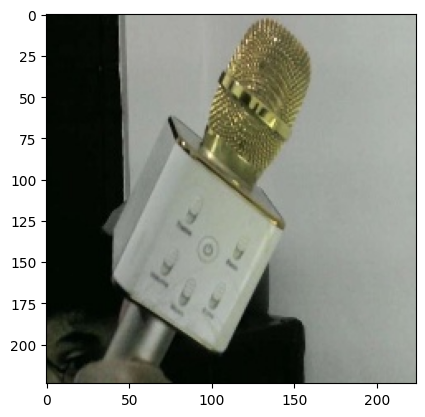

In [ ]:
plt.imshow(imread(img_path))

Use VGG-16 pre-trained model

In [ ]:
from keras.applications import vgg16

vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Create a function to load model, image, preprocess input and targets

In [ ]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)

    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

Predict the result

In [ ]:
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 [==============================] - 1s 779ms/step


,Predicted Class,Name,Probability
0,n04423845,thimble,0.466310
1,n03759954,microphone,0.280930
2,n03916031,perfume,0.037975
3,n03666591,lighter,0.027804
4,n04372370,switch,0.025579
5,n04579432,whistle,0.012929
6,n02910353,buckle,0.011715
7,n04286575,spotlight,0.009757
8,n03424325,gasmask,0.007375
9,n04141327,scabbard,0.006883


Interpret the result of prediction using VGG16 model

> The model incorrectly predicted the object in the picture. I can definitely see how the model got confused, the grill/top of the microphone can be mistaken as a thimble, especially when the picture provided has low quality. Some more uncommon features of the microphone, specifically the white box, may have confused the model. The color can also be a factor.

Use Resnet50 pretrained model

In [ ]:
from keras.applications import resnet50

resnet50_model = resnet50.ResNet50(weights='imagenet')

resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

Predict the result

In [ ]:
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

1/1 [==============================] - 3s 3s/step


,Predicted Class,Name,Probability
0,n03759954,microphone,0.971691
1,n04423845,thimble,0.027603
2,n04141327,scabbard,0.000218
3,n03666591,lighter,0.000109
4,n04041544,radio,0.000088
5,n03483316,hand_blower,0.000041
6,n04286575,spotlight,0.000019
7,n03075370,combination_lock,0.000019
8,n04153751,screw,0.000014
9,n04154565,screwdriver,0.000013


Interpret the result using RESNET50 pretrained model

> The RESENET50 correctly predicted the right class for the object with a confident 97% probability. This shows that the input may not necessarily be the problem, but it is also unjust to put the blame on the model, since there are still other factors such as differences in hyperparameter settings during training that can impact the model's prediction capabilities.

#### Supplementary Activity

* Use at least three pretrained model and predict the result using the saved image.
* Compare their accuracy results.

Using Xception

In [ ]:
from keras.applications import xception

xception_model = xception.Xception(weights='imagenet')
xception_model.summary()

91884032/91884032 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_3[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activat

In [ ]:
predict_image(xception_model, img_path, xception.preprocess_input, xception.decode_predictions, (299, 299))

1/1 [==============================] - 3s 3s/step


,Predicted Class,Name,Probability
0,n03759954,microphone,0.919295
1,n04372370,switch,0.017499
2,n04141327,scabbard,0.014022
3,n04423845,thimble,0.009939
4,n04041544,radio,0.002406
5,n04456115,torch,0.002158
6,n03075370,combination_lock,0.001929
7,n03874599,padlock,0.001866
8,n03666591,lighter,0.001029
9,n03777754,modem,0.000971


Using InceptionResNetV2

In [ ]:
from keras.applications import inception_resnet_v2

inception_resnet_model = inception_resnet_v2.InceptionResNetV2(weights='imagenet')
inception_resnet_model.summary()

225209952/225209952 [==============================] - 1s 0us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 149, 149, 32)         864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_4 (Bat  (None, 149, 149, 32)         96        ['conv2d_4[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 activation (

In [ ]:
predict_image(inception_resnet_model, img_path, inception_resnet_v2.preprocess_input,
              inception_resnet_v2.decode_predictions, (299, 299))

1/1 [==============================] - 9s 9s/step


,Predicted Class,Name,Probability
0,n04423845,thimble,0.591926
1,n03759954,microphone,0.078071
2,n04372370,switch,0.020459
3,n03857828,oscilloscope,0.007069
4,n04153751,screw,0.004751
5,n03916031,perfume,0.003844
6,n03602883,joystick,0.003301
7,n03494278,harmonica,0.002623
8,n03532672,hook,0.002507
9,n03272010,electric_guitar,0.002399


Using NASNetLarge

In [ ]:
from keras.applications import nasnet

nasnetlarge_model = nasnet.NASNetLarge(weights='imagenet')
nasnetlarge_model.summary()

359748576/359748576 [==============================] - 2s 0us/step
Model: "NASNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 331, 331, 3)]        0         []                            
                                                                                                  
 stem_conv1 (Conv2D)         (None, 165, 165, 96)         2592      ['input_5[0][0]']             
                                                                                                  
 stem_bn1 (BatchNormalizati  (None, 165, 165, 96)         384       ['stem_conv1[0][0]']          
 on)                                                                                              
                                                                                                  
 activation_203 (Activatio

In [ ]:
predict_image(nasnetlarge_model, img_path, nasnet.preprocess_input, nasnet.decode_predictions, (331, 331))

1/1 [==============================] - 14s 14s/step


,Predicted Class,Name,Probability
0,n03759954,microphone,0.702069
1,n04423845,thimble,0.138759
2,n04041544,radio,0.003071
3,n04372370,switch,0.002737
4,n04074963,remote_control,0.001960
5,n03075370,combination_lock,0.001902
6,n03666591,lighter,0.001818
7,n04296562,stage,0.001629
8,n03255030,dumbbell,0.001524
9,n03272010,electric_guitar,0.001513


> Xception seems to have confidently identified the microphone, while NASNetLarge have shown some uncertainty, and InceptionResNetV2 got the class evidently wrong, possibly due to the presence of features resembling a thimble, just like what happened to VGG16. It's important to note that models have different architectures, which means they learn different features and patterns from the input data. They were also trained on different datasets with varying images and labels, leading to variations in their learned representations.

#### Conclusion

> In summary, I explored 5 different pre-trained deep learning models to predict the class of an image. ResNet50, Xception, and NASNetLarge consistently identified the microphone accurately. However, NASNetLarge had a lower confidence in its prediction, and InceptionResNetV2 and VGG16 faced challenges, making unexpected primary predictions. These models are certainly not perfect and may sometimes make errors, especially when faced with challenging or ambiguous inputs. Additionally, the functions to capture and save a webcam capture could not run properly, therefore I opted to use the code snippet for camera capture built in to Google Colab.